# Homework 4: Population Genetics

#### **Please read the following instructions carefully before you continue.**

To use this template, click `File` > `Save a copy in Drive`. You now have your own editable copy to which you can add your code. However, before you make changes, note that we've scaffolded this notebook to help get you started:

- We've already written `import` statements for all the modules you should need. This week, you could feasibly do everything without importing any external modules; do whatever is most helpful for you.
- We provide an introduction that lays out one potential approach for solving the problem, explaining what each logical "chunk" of your code ought to accomplish. You can use this as a starting point for writing your own code.  

Of course, if you'd rather do your own thing, you are not required to follow the path we've laid out, or use the modules we've recommended. However, a few things _are_ required (refer to the [Intro to Colab](https://colab.research.google.com/drive/1fq_HaiuYb1L18uGcoA3eGs6taiUafR-6?usp=sharing) notebook):

- _Literate style._ Dumping everything into a single, monstrous code cell is illegible and unacceptable. Remember to divide your code into reasonable, logical chunks, and to follow up each code cell with a text cell that explains and interprets the results.
- _Comments._ That said, writing "literate" code is not an excuse to avoid writing comments :)
- _Problem labels/numbers._ Please use text cells to clearly label where your solution to one problem ends, and the next begins.

Remember that a human is going to read and grade your notebook, so it is in your best interest to help them understand your work clearly. Your finished solution to a given problem should flow coherently from one code cell to the next. (Our "scaffold" helps you do this!)

If you get stuck, remember that [tutorials](https://bi1.caltech.edu/2024/tutorials) are held in-person each week. Also, note that in accordance with course policy, [the use of generative AI tools is forbidden](https://bi1.caltech.edu/2024/policies) unless otherwise specified.

---

---

## Introduction

This week's set is one of the most computationally intensive that we'll face, but fear not!

As always, we will just about take you to the finish line in this week's tutorial. Recitations and office hours are also available to guide you. Reach out to your TAs for help -- it's what we're here for!

In [ ]:
# for scientific computing
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look nicer
sns.set_context('poster')
sns.set_style('ticks')

## Question 1c

In [ ]:
"""
Define a function that finds the frequencies of each proportion
of red alleles at a given generation number, given the starting
frequency and number of alleles.
"""
def getFreq(numGens, startFreq, alleles):
    freq = np.zeros(numGens+1);
    freq[0] = startFreq;
    for i in range(numGens):
      random = np.random.rand(alleles);
      newRed = np.sum(random < freq[i]);
      freq[i+1] = newRed/alleles;

    return freq;


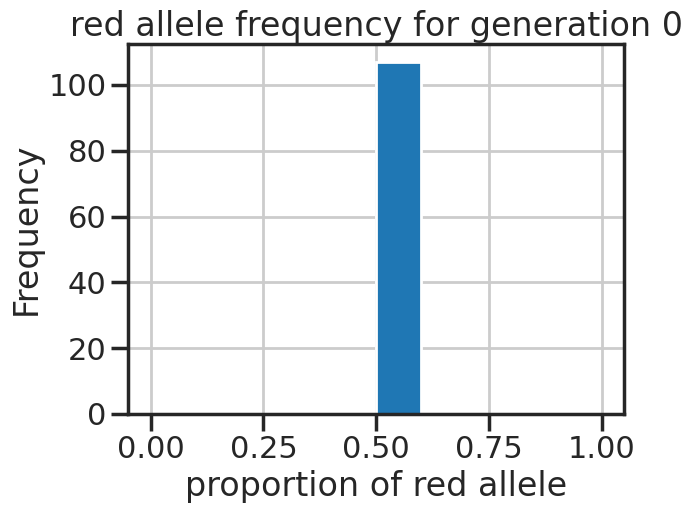

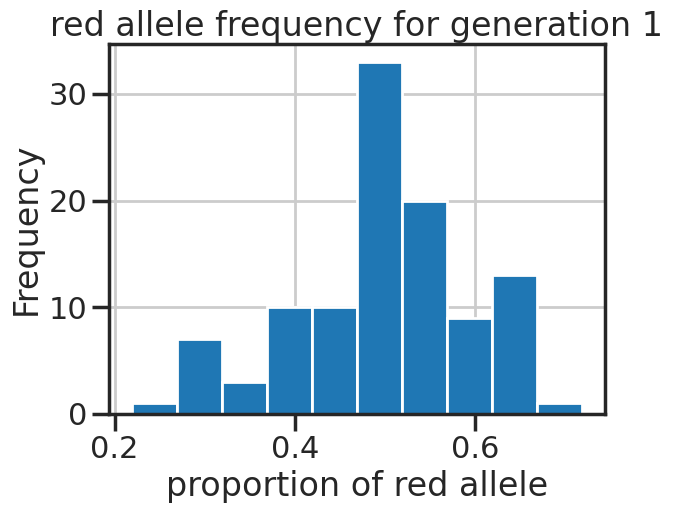

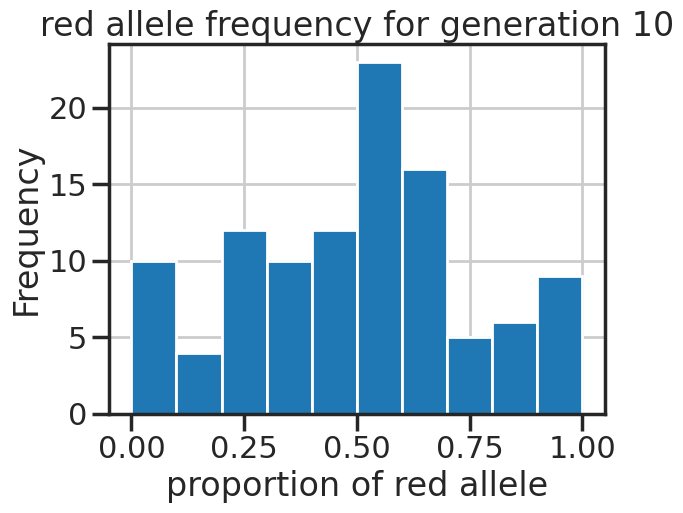

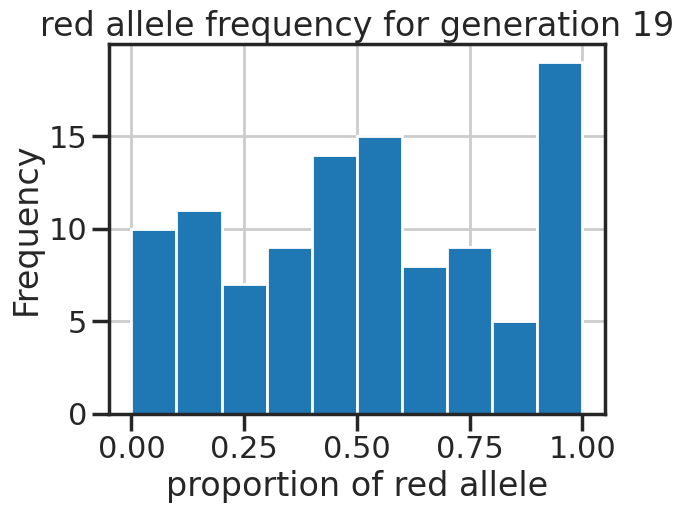

In [ ]:
"""
Define the number of populations and the generation numbers we
would like to display. Also declare the list that stores the
frequencies of porportions of red alleles.
"""
numPop = 107;
numGen = [0, 1, 10, 19];
freqs = [];

for j in range(len(numGen)):
  freqs = [];
  for i in range (numPop):
    """
    freqAtPop is the list of frequencies at a certain generation,
    of red alleles for the current population number
    """
    freqAtPop = getFreq(numGen[j], 0.5, 32)
    freqs.append(freqAtPop[numGen[j]]);

  plt.hist(freqs)
  plt.xlabel('proportion of red allele')
  plt.ylabel('Frequency')
  plt.title('red allele frequency for generation ' +  str(numGen[j]))
  plt.grid(True)
  plt.show()

_add text and code cells here_

## Question 1d

In [ ]:
"""
Define a function that determines the index (which indicates
generation number for us) at which the frequency reaches 0 or
1, which is the fixation time.
"""
def findFixation(freq):
  # print(freq)
  for i in range(len(freq)):
    if(freq[i] == 0 or freq[i] == 1):
      return i;

  return 0;

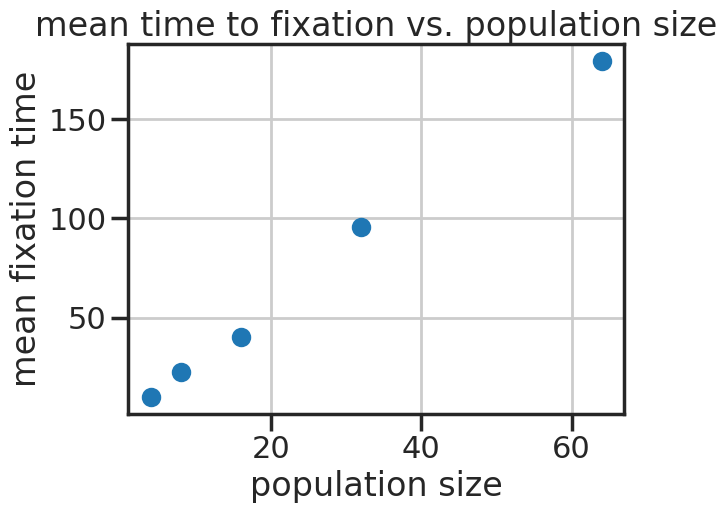

In [ ]:
"""
Define the number of populations and the population sizes we
are calculating fixation times for. Also declare the list that stores the
frequencies of porportions of red alleles and the means of the fixation
times for each population size.
"""

numPops = 107;
popSize = [4, 8, 16, 32, 64];
numGen = 10*10*10;
fixationTime = [];
means = [];

for j in range(len(popSize)):
  fixationTime = [];
  for i in range (numPops):
    """
    freqAtPop is the list of frequencies up to numGen number
    of generations of red alleles for the specified population size
    """
    freqAtPop = getFreq(numGen, 0.5, popSize[j]*2);
    """
    find the fixation time for this population size and number,
    then find the mean and add it to the list of means
    """

    fixationTime.append(findFixation(freqAtPop));

  means.append(sum(fixationTime)/len(fixationTime));

plt.scatter(popSize, means)
plt.xlabel('population size')
plt.ylabel('mean fixation time')
plt.title('mean time to fixation vs. population size')
plt.grid(True)
plt.show()

There seems to be a positive linear trend in the plot of mean fixation time versus population size. This means that fixation time increases linearly with population size.

_add text and code cells here_

## Question 1e

_add text and code cells here_

In [ ]:
"""
Define a function that finds the frequencies of each proportion
of red alleles at a given generation number, taking into account
mutations that turn given the starting
frequency and number of alleles.
"""
def getFreqMutation(numGens, startFreq, alleles, mutProb):
    freq = np.zeros(numGens+1);
    freq[0] = startFreq;
    for i in range(numGens):
      random = np.random.rand(alleles);
      newRed = np.sum(random < freq[i]);
      redMut = np.random.rand(newRed);
      redFlip = np.sum(redMut < mutProb);
      whiteMut = np.random.rand(alleles - newRed);
      whiteFlip = np.sum(whiteMut < mutProb);
      newRed = newRed - redFlip + whiteFlip;
      freq[i+1] = newRed/alleles;
    return freq;


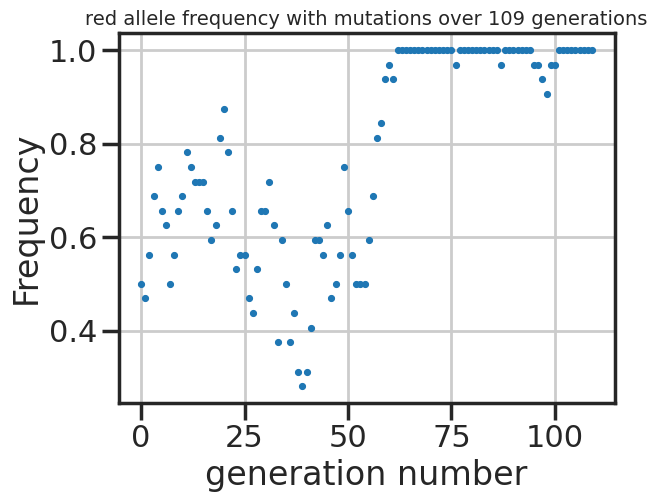

In [ ]:
"""
Define the population, number of generations, and mutation
probability we would like to simulate.
"""
popSize = 16;
numGen = 109;
mutProb = 0.001;
"""
Call getFreqMutation to get the frequencies of alleles after
taking into account mutations. Then, plot this frequency
against generation number.
"""
frequencies = getFreqMutation(numGen, 0.5, 2*popSize, mutProb);
plt.scatter(list(range(110)), frequencies, s=10)
plt.xlabel('generation number')
plt.ylabel('Frequency')
plt.title('red allele frequency with mutations over 109 generations', fontsize = 14);
plt.grid(True)
plt.show()


Based on the plot, it seems that over time, the proportion of red alleles goes to 0 or 1, which means that mutations result in a lower fixation time, comparing it to the data from the previous part.

## Question 1f

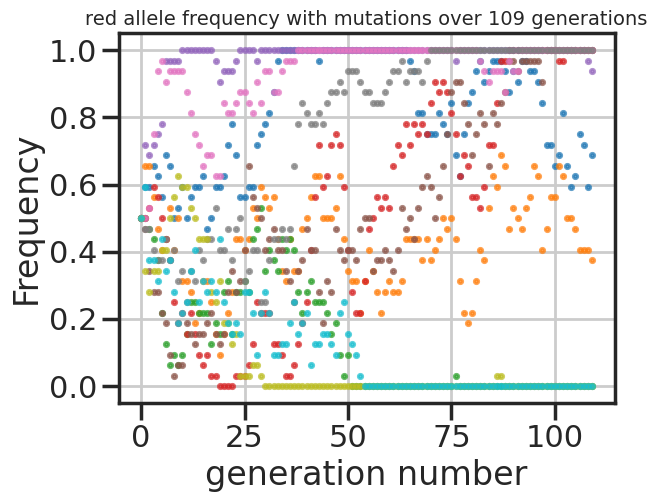

In [ ]:
popSize = 16;
numGen = 109;
mutProb = 0.001;
"""
Simulate 100 populations with mutations, but graph only
populations that are indexed at a multiple of 10, so
only 10 populations are graphed.
"""
for i in range(100):
  frequencies = getFreqMutation(numGen, 0.5, 2*popSize, mutProb);
  if(i %10 == 0):
    plt.scatter(list(range(110)), frequencies, s=10, alpha=0.7)
plt.xlabel('generation number')
plt.ylabel('Frequency')
plt.title('red allele frequency with mutations over 109 generations', fontsize = 14);
plt.grid(True)
plt.show()

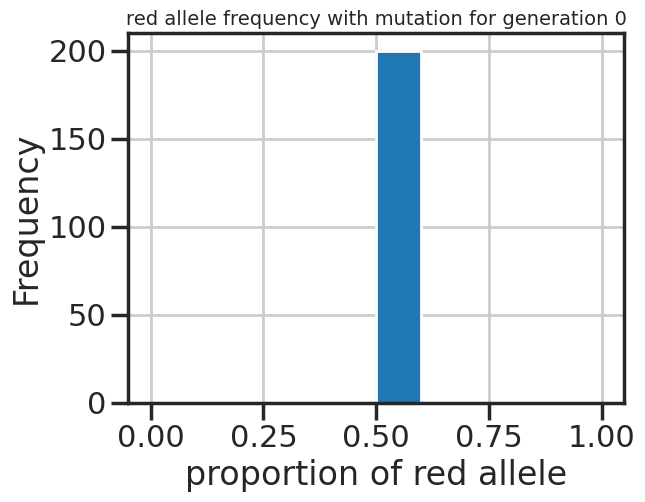

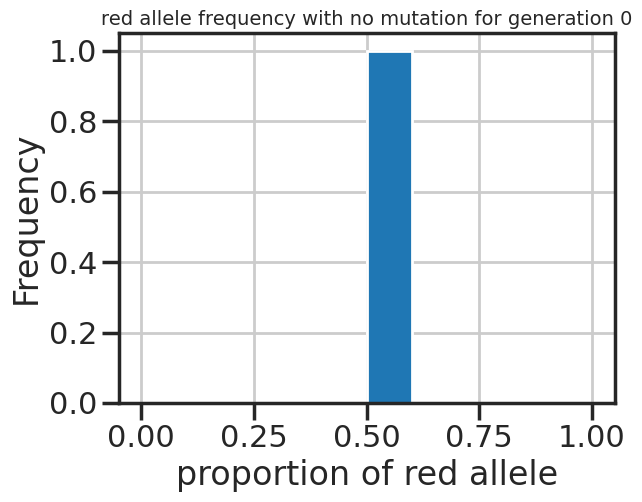

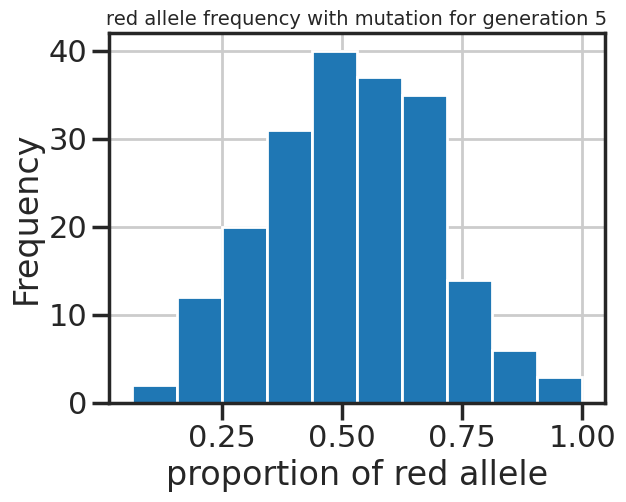

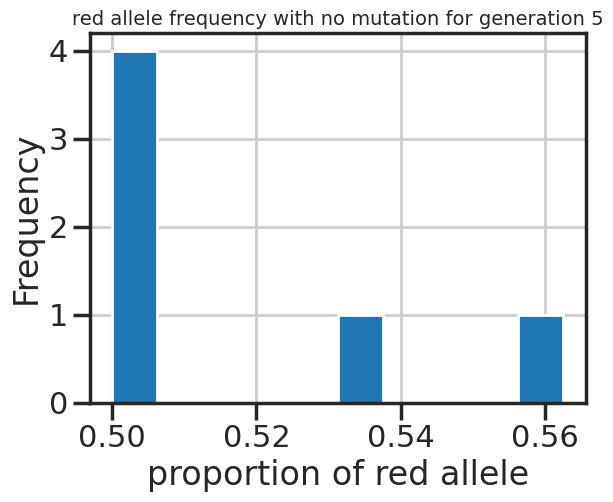

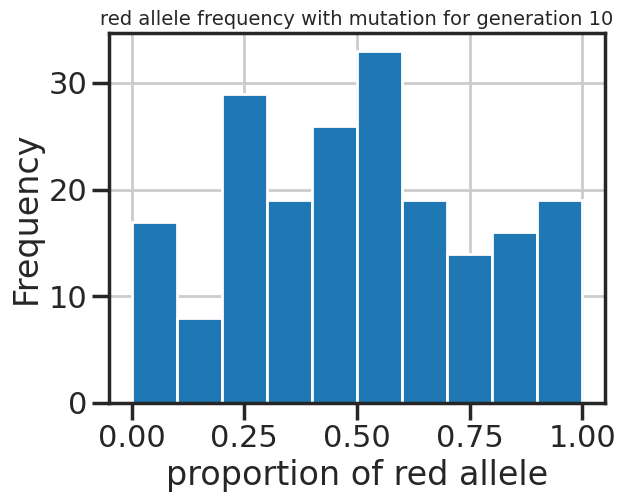

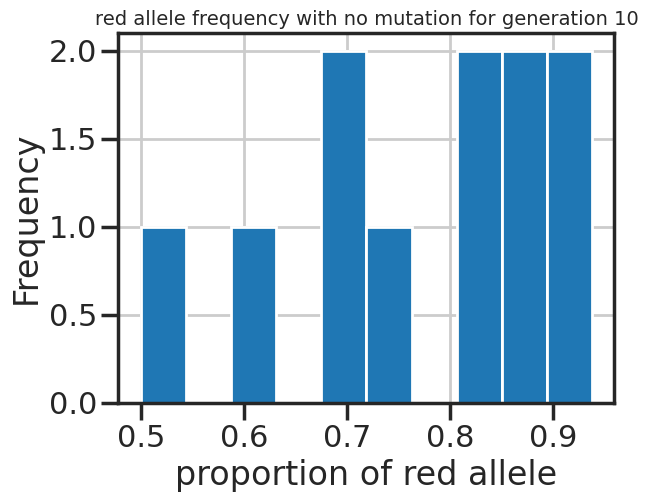

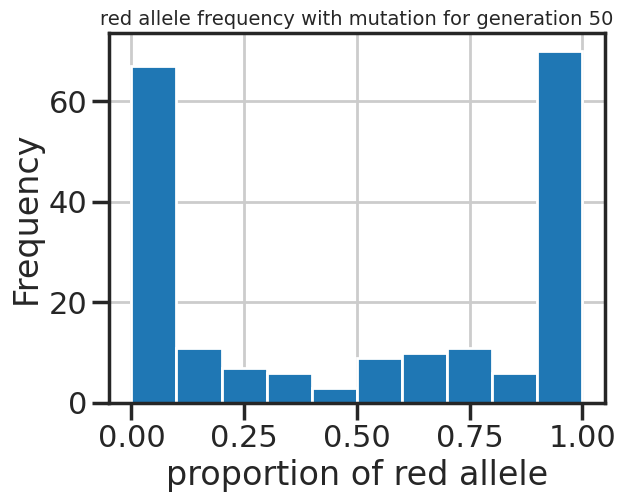

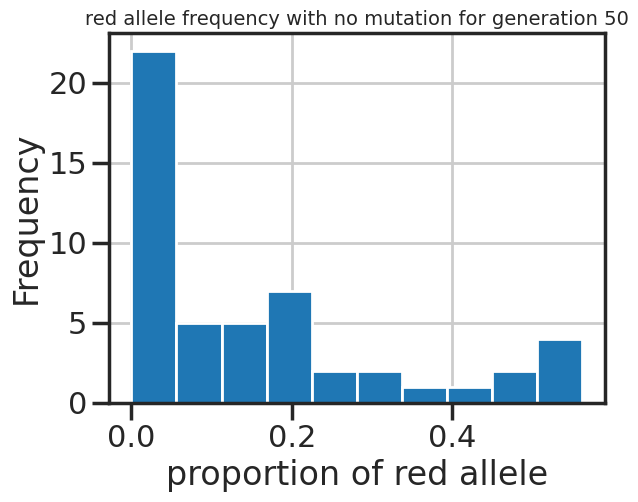

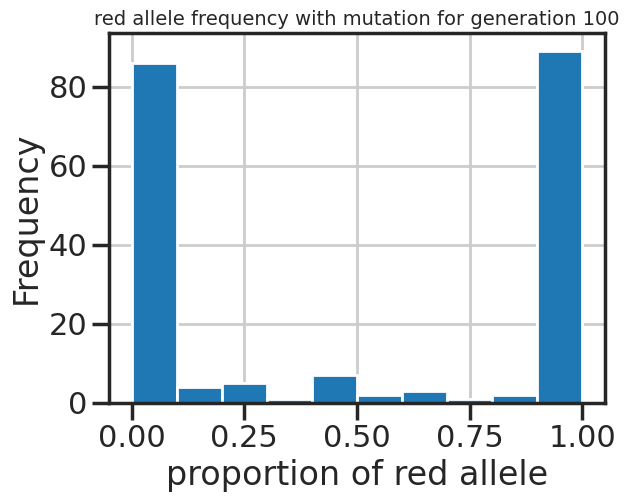

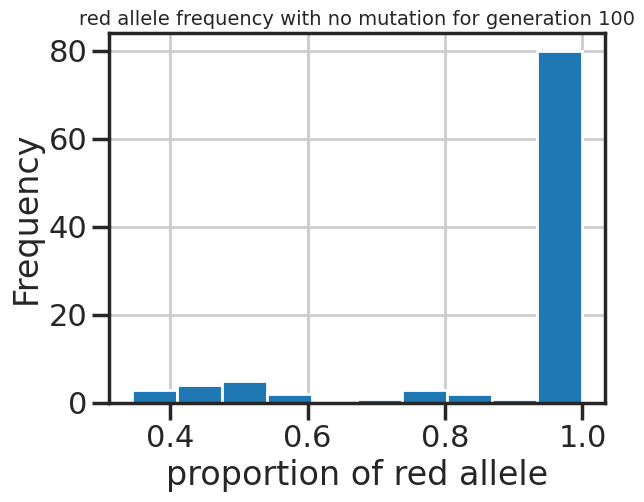

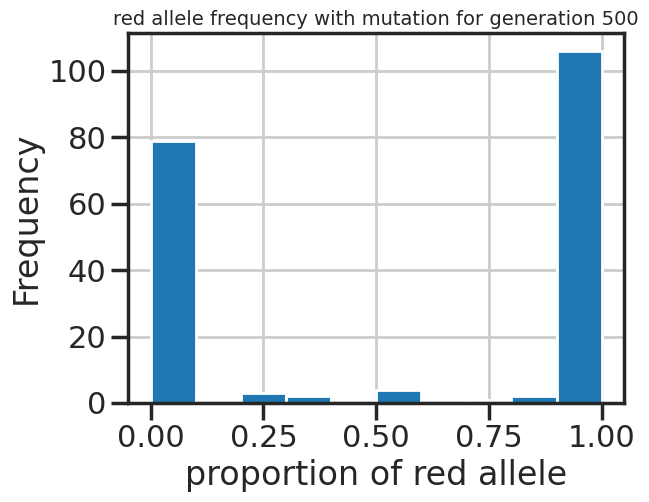

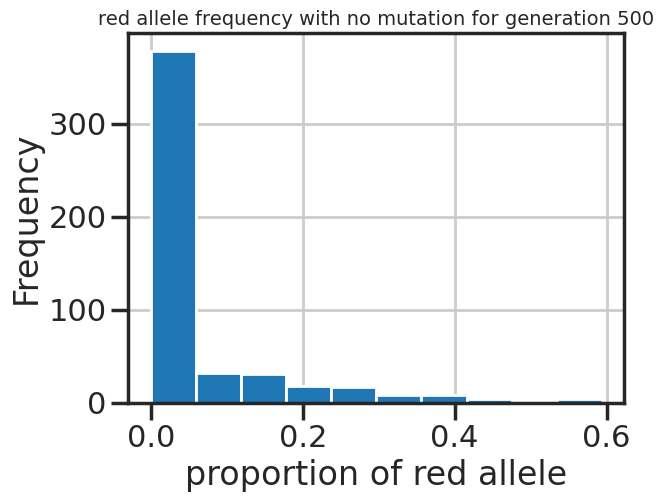

In [ ]:
"""
Define the number of populations, the population size, the
mutation proability, and the generation numbers we
would like to display. Also declare the list that stores the
frequencies of porportions of red alleles.
"""
numPop = 100;
popSize = 16;
mutProb = 0.001;
numGen = [0, 5, 10, 50, 100, 500];
freqs2 = [];
freqs = [];

for j in range(len(numGen)):
  freqs = [];
  for i in range (numPop):
    """
    freqAtPop is the list of frequencies at a certain generation,
    of red alleles for the current population number
    """
    freqAtPop = getFreqMutation(numGen[j], 0.5, 2*popSize, mutProb);
    freqs.append(freqAtPop[numGen[j]]);
    freqNoMut = getFreq(numGen[j], 0.5, 2*popSize);
    freqs.append(freqNoMut[numGen[j]]);

  plt.hist(freqs)
  plt.xlabel('proportion of red allele')
  plt.ylabel('Frequency')
  plt.title('red allele frequency with mutation for generation ' +  str(numGen[j]), fontsize = 14)
  plt.grid(True)
  plt.show()

  plt.hist(freqNoMut)
  plt.xlabel('proportion of red allele')
  plt.ylabel('Frequency')
  plt.title('red allele frequency with no mutation for generation ' +  str(numGen[j]), fontsize = 14)
  plt.grid(True)
  plt.show()

_add text and code cells here_

These histograms show that after many generations with a mutation, the alleles are not fixed to one type, but instead they are about split. When the mutation probability is 0, the alleles fixate to one type.

## Question 1g

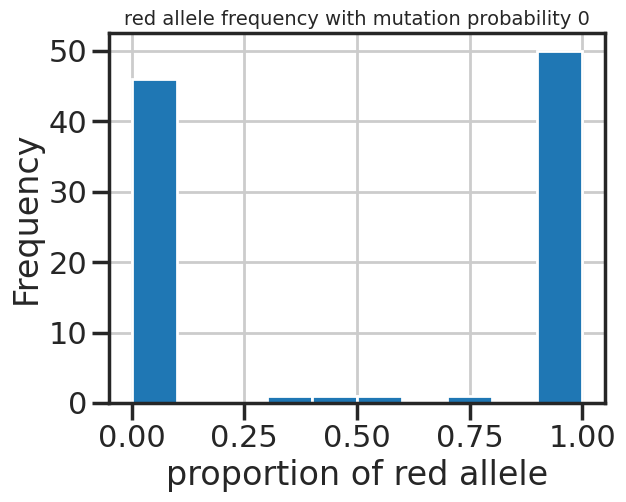

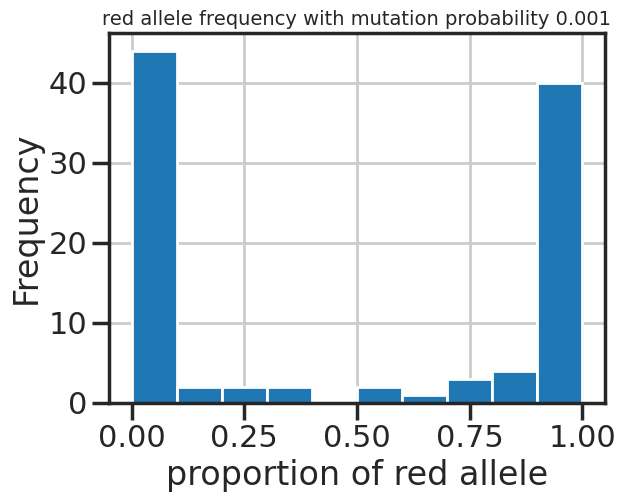

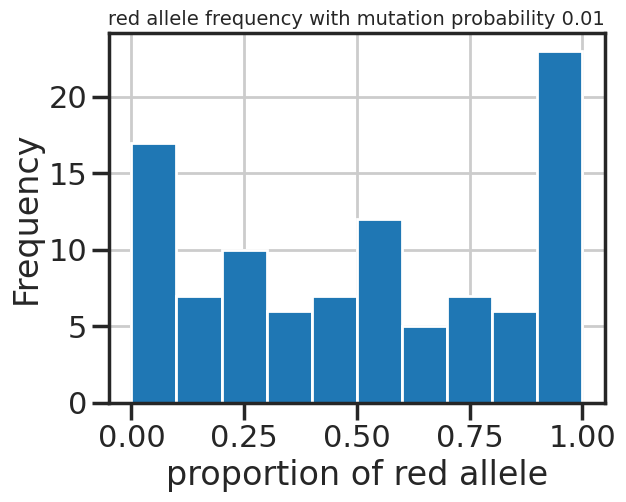

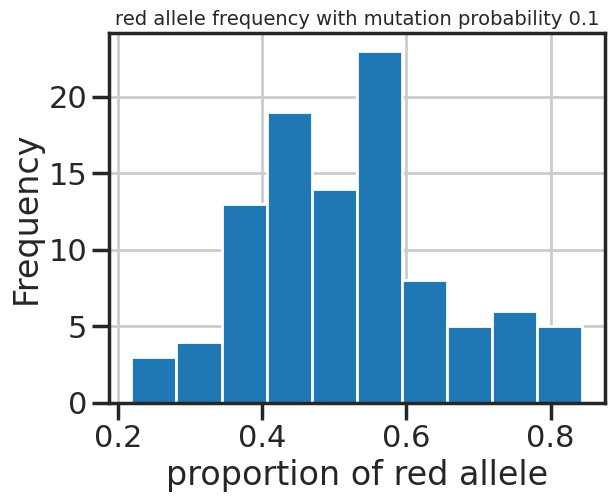

In [ ]:
"""
Define the number of populations, the population size, the
mutation proabilities, and the generation number we
would like to display. Also declare the list that stores the
frequencies of porportions of red alleles.
"""
popSize = 16;
mutProb = [0, 0.001, 0.01, 0.1];
numGen = 109;
freqs = [];
numPop = 100;

for j in range(len(mutProb)):
  freqs = [];
  for i in range(numPop):
    """
    freqAtPop is the list of frequencies at a certain generation,
    of red alleles for the current population number
    """
    freqAtPop = getFreqMutation(numGen, 0.5, 2*popSize, mutProb[j]);
    freqs.append(freqAtPop[numGen]);



  plt.hist(freqs)
  plt.xlabel('proportion of red allele')
  plt.ylabel('Frequency')
  plt.title('red allele frequency with mutation probability ' +  str(mutProb[j]), fontsize = 14)
  plt.grid(True)
  plt.show()

The histograms show that the higher the mutation probability, the less fixated the alleles become with a larger number of generations. The alleles seem to become fixated only up to a mutation probability of 0.001.

_add text and code cells here_

## Question 2c

_add text and code cells here_

In [ ]:
"""
Define functions that find p(t) and q(t) based on the
expressions found in 2b. Both functions take parameters
for t, p0, and s to calculate p(t) and q(t) at a
certain t.
"""
def p(t, p0, s):
  return p0/(p0 + (1-p0)*np.exp(-np.log(2)*s*t));

def q(t, p0, s):
  return (1-p0)*np.exp(-np.log(2)*s*t)/(p0 + (1-p0)*np.exp(-np.log(2)*s*t));

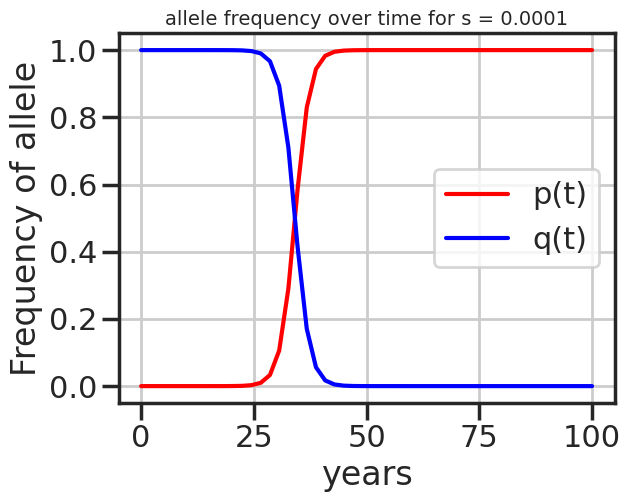

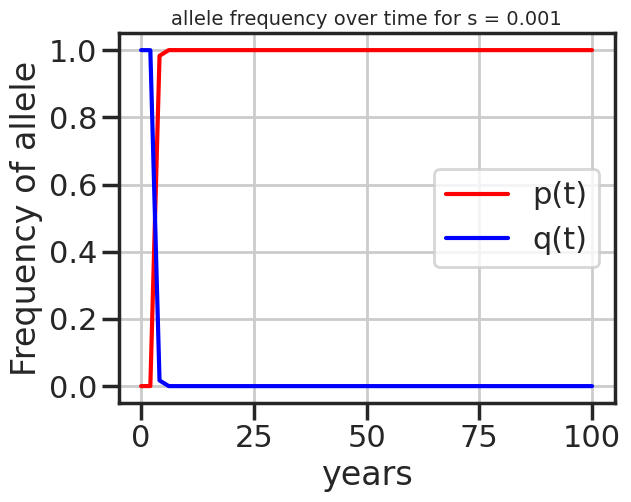

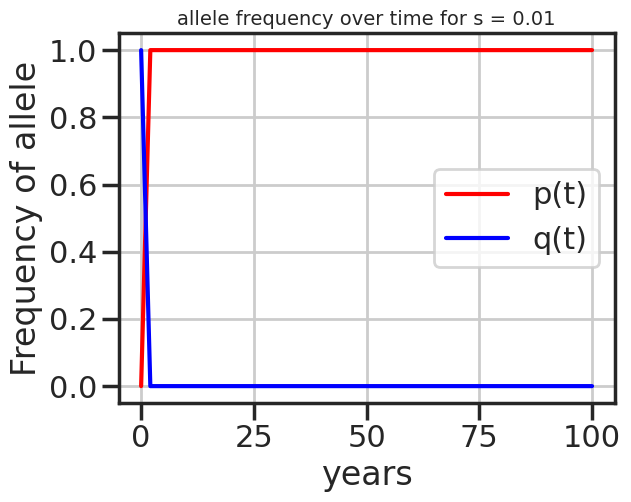

In [ ]:
"""
Define the initial frequency of the allele which was given
in the question and the list of values for s. Also create
an array of years for 100 years, and convert it to hours.
"""
p0=10**-9;
s=[10**-4, 10**-3, 10**-2];

years = np.linspace(0, 100)

hours = 8760 * years

"""
Plot p(t) and q(t) on the same graph for each
value of s.
"""

for j in range(len(s)):
  plt.plot(years, p(hours, p0, s[j]), label = "p(t)", color = "red")
  plt.plot(years, q(hours, p0, s[j]), label = "q(t)", color = "blue")
  plt.xlabel('years')
  plt.ylabel('Frequency of allele')
  plt.title('allele frequency over time for s = ' + str(s[j]), fontsize = 14)
  plt.legend()
  plt.grid(True)
  plt.show()



---

### Submission instructions

When you're finished, recall the steps for submitting Colab notebooks:

1. Run all the cells from top-to-bottom, in order (`Runtime` > `Run all`).
2. Once the entire notebook has completed running and the output of all cells is visible, save it (`File` > `Save`).
3. Download the notebook in `.ipynb` format (`File` > `Download` > `Download .ipynb`).
4. Rename the file according to the usual convention (`lastname_firstname_hw#.ipynb`), if you haven't already.
5. Upload the file to Gradescope.
